In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [3]:
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [4]:
information = pd.read_csv("day.csv")#Place this file in the current Directory

In [5]:
information.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
information.shape

(730, 16)

In [7]:
#check all the null coloumns present in the set.

# Let's check for any null columns
information.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#NO null values are there SO it's all good.

In [9]:
information[["weekday", "workingday"]]
#let's see which is weekday and which is working day

,weekday,workingday
0,6,0
1,0,0
2,1,1
3,2,1
4,3,1
...,...,...
725,4,1
726,5,1
727,6,0
728,0,0


In [10]:
#All 0's are holidays and 1's are working days.
# The encodings for month is given to us in data dictionary

information["mnth"] = information.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12], ["January", "February", "March", "April", "May",
                                                                 "June", "July", "August", "September", "October",
                                                                 "Novermber", "December"])

information["weekday"] = information.weekday.replace([0,1,2,3,4,5,6], ["Tuesday", "Wednesday", "Thursday", "Friday", "Saturday",
                                                        "Sunday", "Monday"])

In [11]:
information[["dteday", "mnth", "weekday","workingday"]]
#Let's do an observation on mnth and the weekdays of the set

,dteday,mnth,weekday,workingday
0,01-01-2018,January,Monday,0
1,02-01-2018,January,Tuesday,0
2,03-01-2018,January,Wednesday,1
3,04-01-2018,January,Thursday,1
4,05-01-2018,January,Friday,1
...,...,...,...,...
725,27-12-2019,December,Saturday,1
726,28-12-2019,December,Sunday,1
727,29-12-2019,December,Monday,0
728,30-12-2019,December,Tuesday,0


In [16]:
#Check total months,days and verify

print(f"Unique weekdays are : {information.weekday.unique()} \n")
print(f"Number of unique weekdays are :{information.weekday.nunique()}")
print(f"Unique months are : {information.mnth.unique()} \n")
print(f"Number of unique months are :{information.mnth.nunique()}")

Unique weekdays are : ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday'] 

Number of unique weekdays are :7
Unique months are : ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'Novermber' 'December'] 

Number of unique months are :12


##	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
        
## Based on the above scenario we can convert them as 1.ideal 2.Misty 3.snow_rain 4.heavy_snow_rain
## And for season 1.spring 2.fall 3.winter 4.summer

In [13]:
print(information.weathersit.unique())
print(information.season.unique())

[2 1 3]
[1 2 3 4]


In [14]:
# It looks like our weather_condition has only recorded 3 types of weather

information["weathersit"] = information["weathersit"].replace([1,2,3,4], ["ideal", "misty", "snow_rain", "heavy_snow_rain"])
information["season"] = information["season"].replace([1,2,3,4], ["spring", "summer", "fall", "winter"])

In [17]:
print(f"Unique seasons are : {information.season.unique()} \n")
print(f"Unique Weather_conditions are : {information.weathersit.unique()} \n")

Unique seasons are : ['spring' 'summer' 'fall' 'winter'] 

Unique Weather_conditions are : ['misty' 'ideal' 'snow_rain'] 



In [18]:
#Now let's undetstand the On which day the weather condition is getting altered
information[["weathersit", "season"]]

,weathersit,season
0,misty,spring
1,misty,spring
2,ideal,spring
3,ideal,spring
4,ideal,spring
...,...,...
725,misty,spring
726,misty,spring
727,misty,spring
728,ideal,spring


In [19]:
information.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,January,0,Monday,0,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,January,0,Tuesday,0,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,January,0,Wednesday,1,ideal,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,January,0,Thursday,1,ideal,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,January,0,Friday,1,ideal,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
#to have an understanding about the data set for the hypotheical values should not be existing so checkigng them
information[information["temp"] <= 0.0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [21]:
information[information["atemp"] <= 0.0]


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [22]:
information[information["windspeed"] <= 0.0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [23]:
#Mostly no errors are there in the set.
#Now let's remove the unwanted coloumns
#NO columns mentioned below are useful for our scenario

In [24]:
Columns_To_Drop = ["instant", "dteday", "casual", "registered"]

information.drop(Columns_To_Drop, axis = 1, inplace = True)
information.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,ideal,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,ideal,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,ideal,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
# Let's define a function for our uni-variate, bi-variate and multi-variate(More than two) analysis

def plots(x = None, y = None, hues = None, rotation = 0, bar_plot = False, box_plot = False, count_plot = False,
         figsisze = (17, 5), fontsize = 10, estimator = np.mean, dataframe = information):
    
    if bar_plot:
        sns.barplot(x = x, y = y, hue = hues, data = dataframe, estimator=estimator)
        plt.gcf().set_size_inches(figsisze)
        plt.title(label = f"Bar plot between {x} and {y}",fontdict = {"fontsize" : fontsize})
        plt.xlabel(xlabel = str(x), fontsize = fontsize)
        plt.ylabel(ylabel = str(y), fontsize = fontsize)
        plt.xticks(fontsize = fontsize, rotation = rotation)
        plt.yticks(fontsize = fontsize)
    
    elif box_plot :
        sns.boxplot(x = x, y = y, hue = hues, data = dataframe)
        plt.gcf().set_size_inches(figsisze)
        plt.title(label = f"Box plot between {x} and {y}",fontdict = {"fontsize" : fontsize})
        plt.xlabel(xlabel = str(x), fontsize = fontsize,rotation = rotation)
        plt.ylabel(ylabel = str(y), fontsize = fontsize)
        plt.xticks(fontsize = fontsize, rotation = rotation)
        plt.yticks(fontsize = fontsize)
 
    elif count_plot:
        sns.countplot(x = x, hue = hues, data = dataframe)
        plt.gcf().set_size_inches(figsisze)
        plt.title(label = f"Count plot between {x} and {y}",fontdict = {"fontsize" : fontsize})
        plt.xlabel(xlabel = str(x), fontsize = fontsize, rotation = rotation)
        plt.ylabel(ylabel = str(y), fontsize = fontsize)
        plt.xticks(fontsize = fontsize, rotation = rotation)
        plt.yticks(fontsize = fontsize)
    
    else :
        print("Please set the Boolean value to True for any of the following plots : \n  [bar_plot, box_plot, count_plot]")


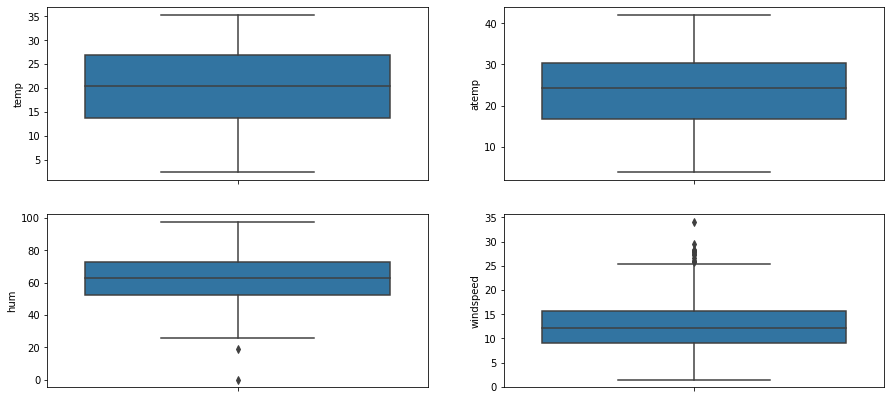

In [28]:
Columns_for_boxplot = ["temp", "atemp", "hum", "windspeed"]

plt.gcf().set_size_inches(15,7)

for i,j in enumerate(Columns_for_boxplot):
    plt.subplot(2,2,i+1)
    sns.boxplot(data = information, y = j)

In [29]:
#NO outliers are there so For now no need to change any thing

In [30]:
##Now will check for the co-linearity

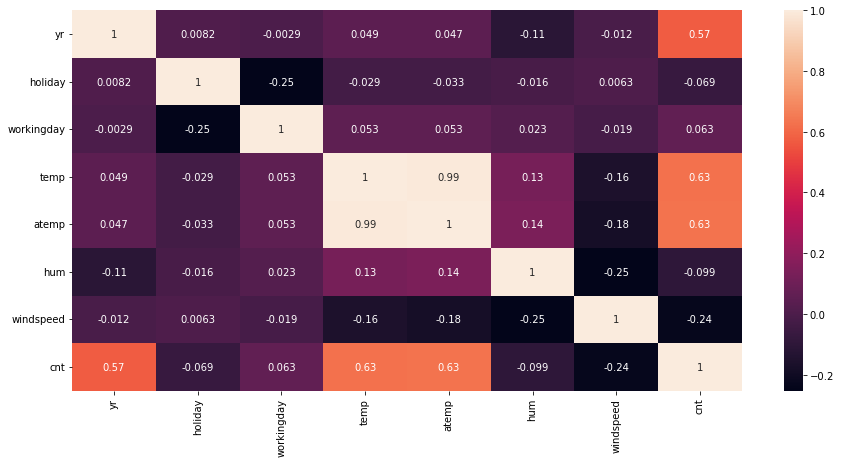

In [31]:
sns.heatmap(information.corr(), annot = True)
plt.gcf().set_size_inches(15,7)

## Colinearity between (temp and atemp) and (temp/atemp and cnt) is also there.

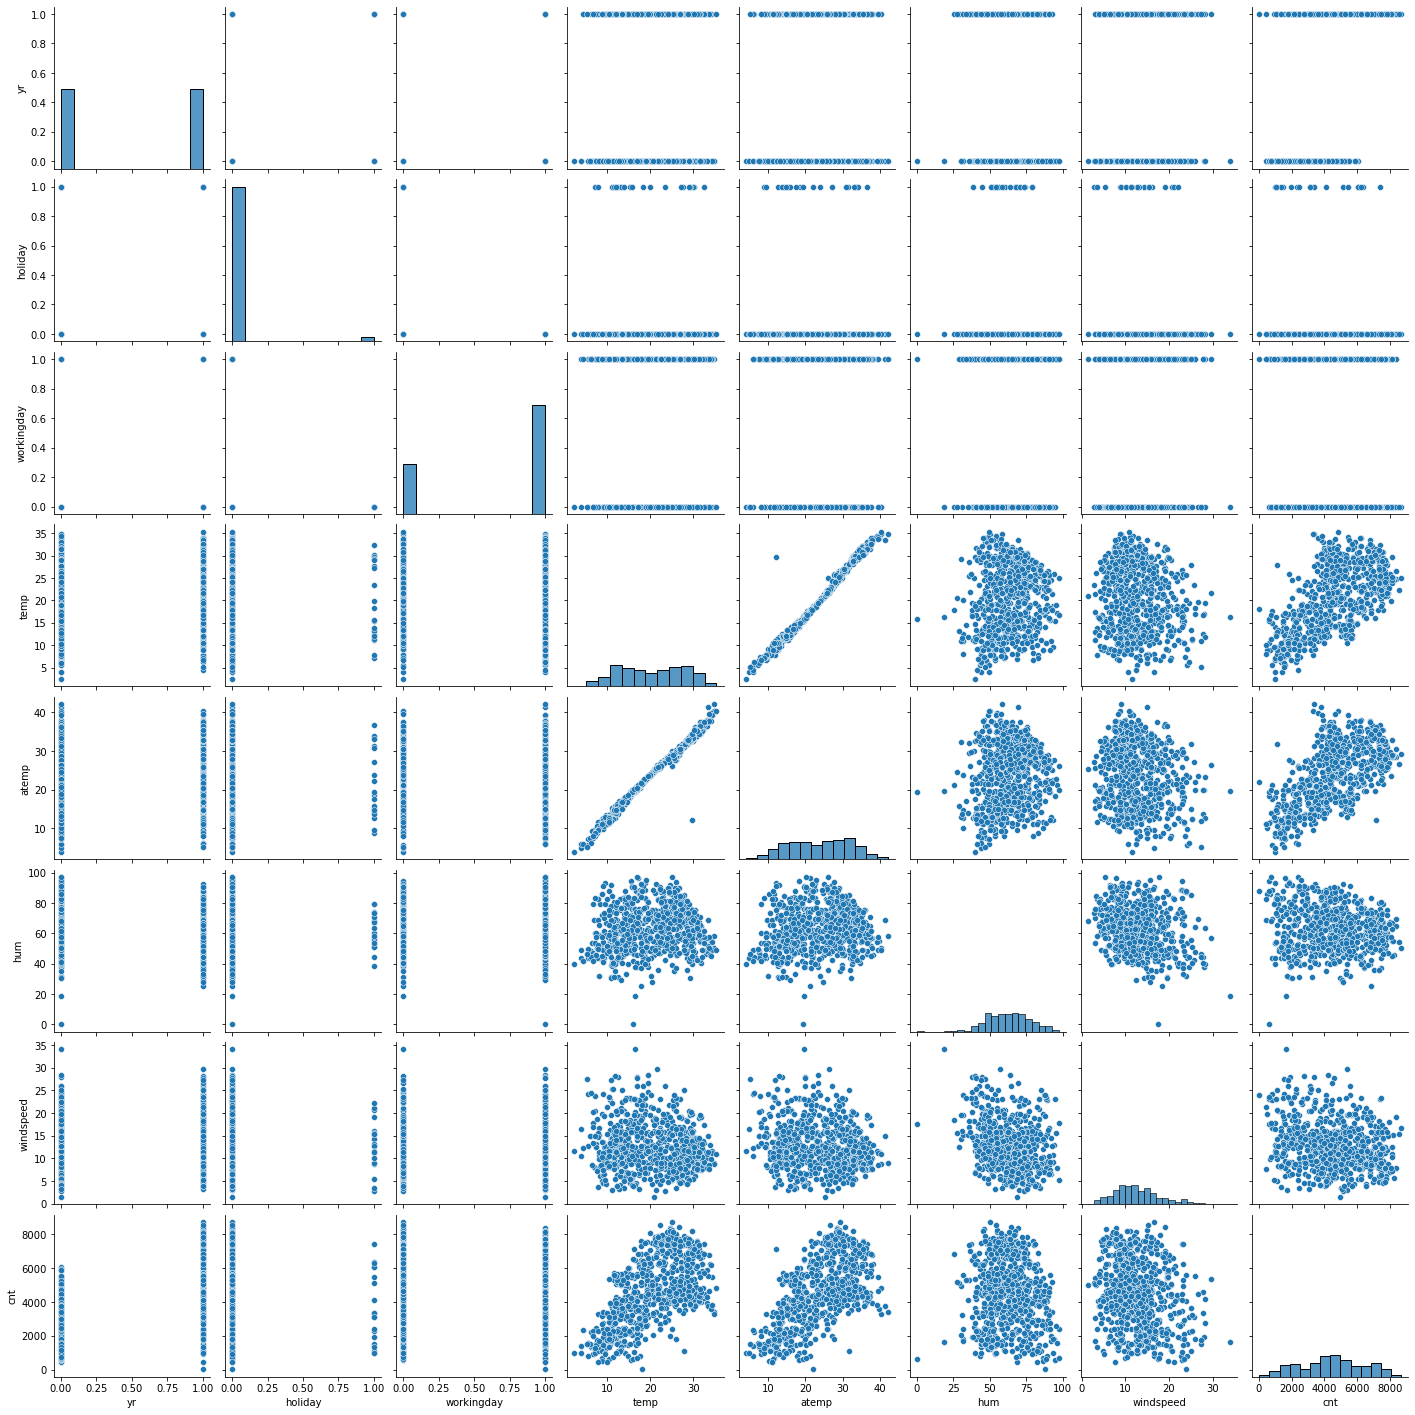

In [32]:
# We will use pairplot to achieve this along with heatmaps

sns.pairplot(information)

<AxesSubplot:xlabel='cnt', ylabel='windspeed'>

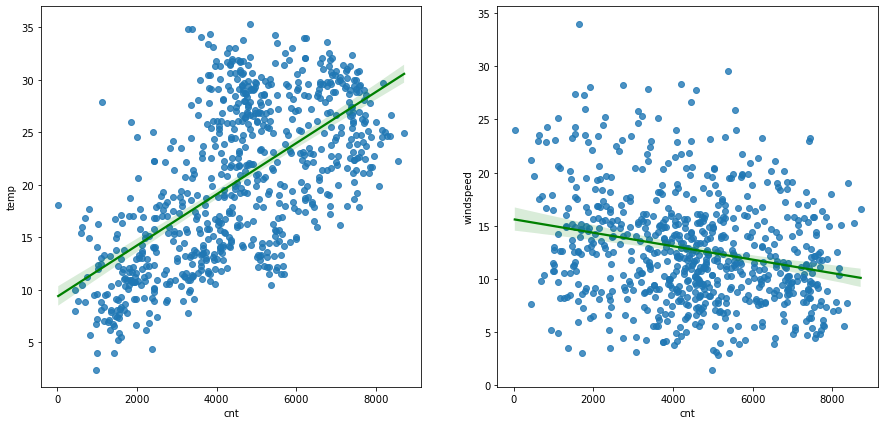

In [33]:
# Now will see b/w the tmp vs cnt and windspeed vs cnt

plt.figure(figsize=(15,7))

plt.subplot(121)
sns.regplot(x = information["cnt"], y = information["temp"], line_kws={"color" : "g"})

plt.subplot(122)
sns.regplot(x = information["cnt"], y = information["windspeed"], line_kws={"color" : "g"})



In [34]:
#windspeed has negative colinearity and temp has positive.

<AxesSubplot:xlabel='cnt', ylabel='hum'>

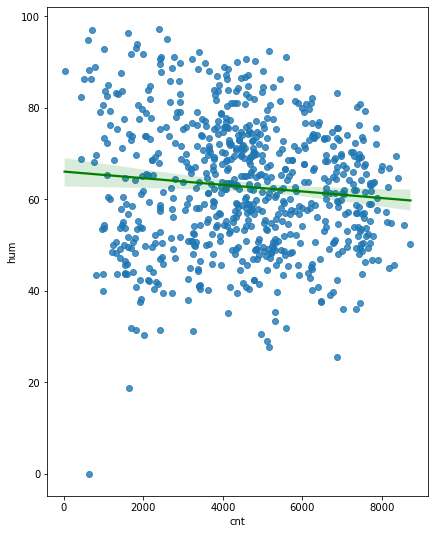

In [35]:
plt.figure(figsize=(15,9))
plt.subplot(121)
sns.regplot(x = information["cnt"], y = information["hum"], line_kws={"color" : "g"})

In [36]:
#It'a a slight negative corelation

## Visualizing the data

In [37]:
#Let's have a glance of our coloums
information.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

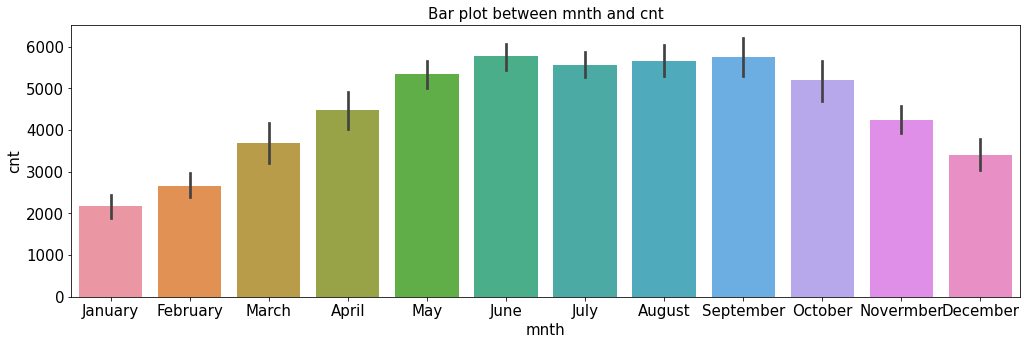

In [38]:
x = "mnth"
y = "cnt"

plots(x = x, y = y, bar_plot = True, fontsize=15)
plt.show()

In [39]:
#Based on the data 6,7,8 months are the highest sales happend

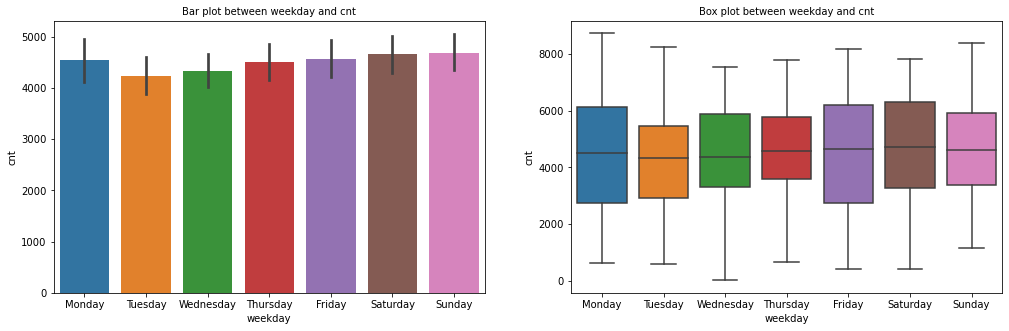

In [40]:
x = "weekday"
y = "cnt"
plt.subplot(121)
plots(x = x, y = y, bar_plot = True)

plt.subplot(122)
plots(x = x, y = y, box_plot = True)

In [41]:
#Nothing new information obtained

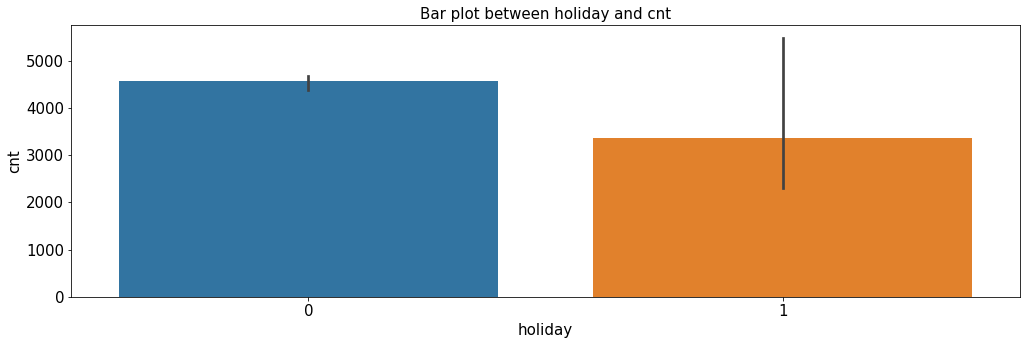

In [42]:
x = "holiday"
y = "cnt"

plots(x = x, y = y, bar_plot = True, fontsize=15, estimator=np.median)


In [43]:
#On working day more bike count is there


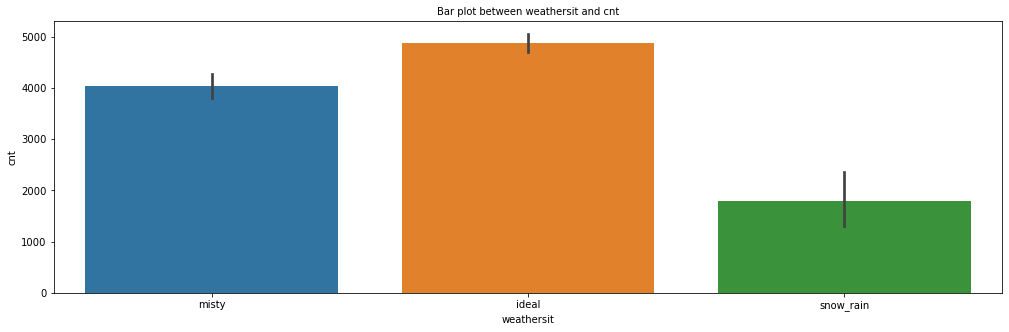

In [44]:
x = "weathersit"
y = "cnt"

plots(x = x, y = y, bar_plot = True)


In [45]:
#In ideal conditions more Bike rides are happening


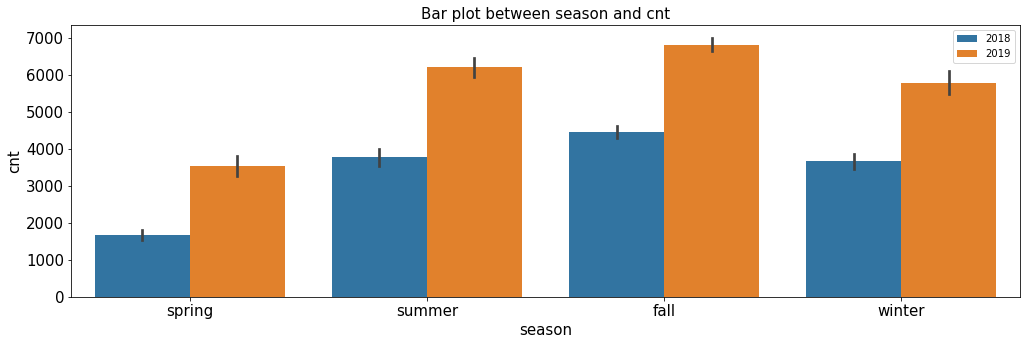

In [46]:
x = "season"
y = "cnt"
hue = "yr"
plots(x = x, y = y, bar_plot = True, hues = hue, fontsize=15)
labels = plt.legend()
labels.get_texts()[0].set_text("2018")
labels.get_texts()[1].set_text("2019")

In [47]:
#In 2019 more growth is there compared to the previous year

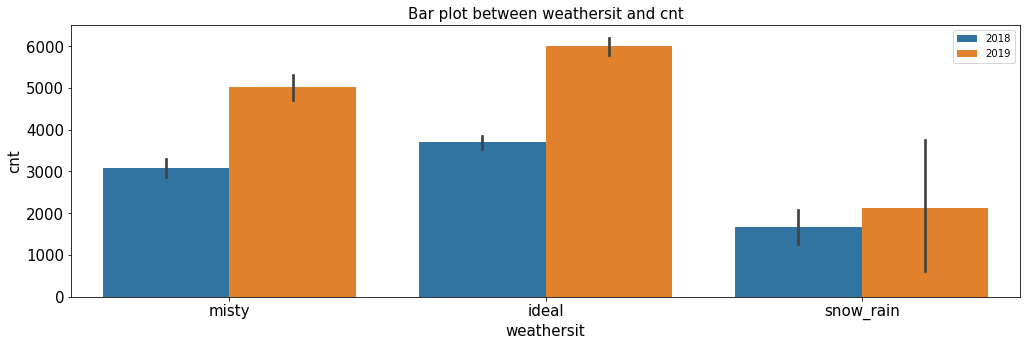

In [48]:
#let's compare with years in different weather conditions
x = "weathersit"
y = "cnt"
hue = "yr"
plots(x = x, y = y, bar_plot = True, hues = hue, fontsize=15)

labels = plt.legend()
labels.get_texts()[0].set_text("2018")
labels.get_texts()[1].set_text("2019")

In [49]:
#we will create a duplicate data to trian the model better

In [51]:
duplicate_season = pd.get_dummies(information["season"], drop_first = True)

duplicate_Month = pd.get_dummies(information["mnth"], drop_first = True)

duplicate_weekday = pd.get_dummies(information["weekday"], drop_first = True)

duplicate_Weather_condition = pd.get_dummies(information["weathersit"], drop_first = True)

In [52]:
duplicate_season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [53]:
duplicate_Month

,August,December,February,January,July,June,March,May,Novermber,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [54]:
duplicate_weekday

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
725,0,1,0,0,0,0
726,0,0,1,0,0,0
727,1,0,0,0,0,0
728,0,0,0,0,1,0


In [55]:
duplicate_Weather_condition

,misty,snow_rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [56]:
data_dup = pd.concat([information, duplicate_season, duplicate_Month, duplicate_weekday, duplicate_Weather_condition], axis = 1)
data_dup.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,misty,snow_rain
0,spring,0,January,0,Monday,0,misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,January,0,Tuesday,0,misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,January,0,Wednesday,1,ideal,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,January,0,Thursday,1,ideal,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,January,0,Friday,1,ideal,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [57]:
data_dup.drop(["season", "mnth", "weekday", "weathersit"], axis = 1, inplace = True)

In [58]:
data_dup.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'Novermber', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'misty', 'snow_rain'],
      dtype='object')

<AxesSubplot:>

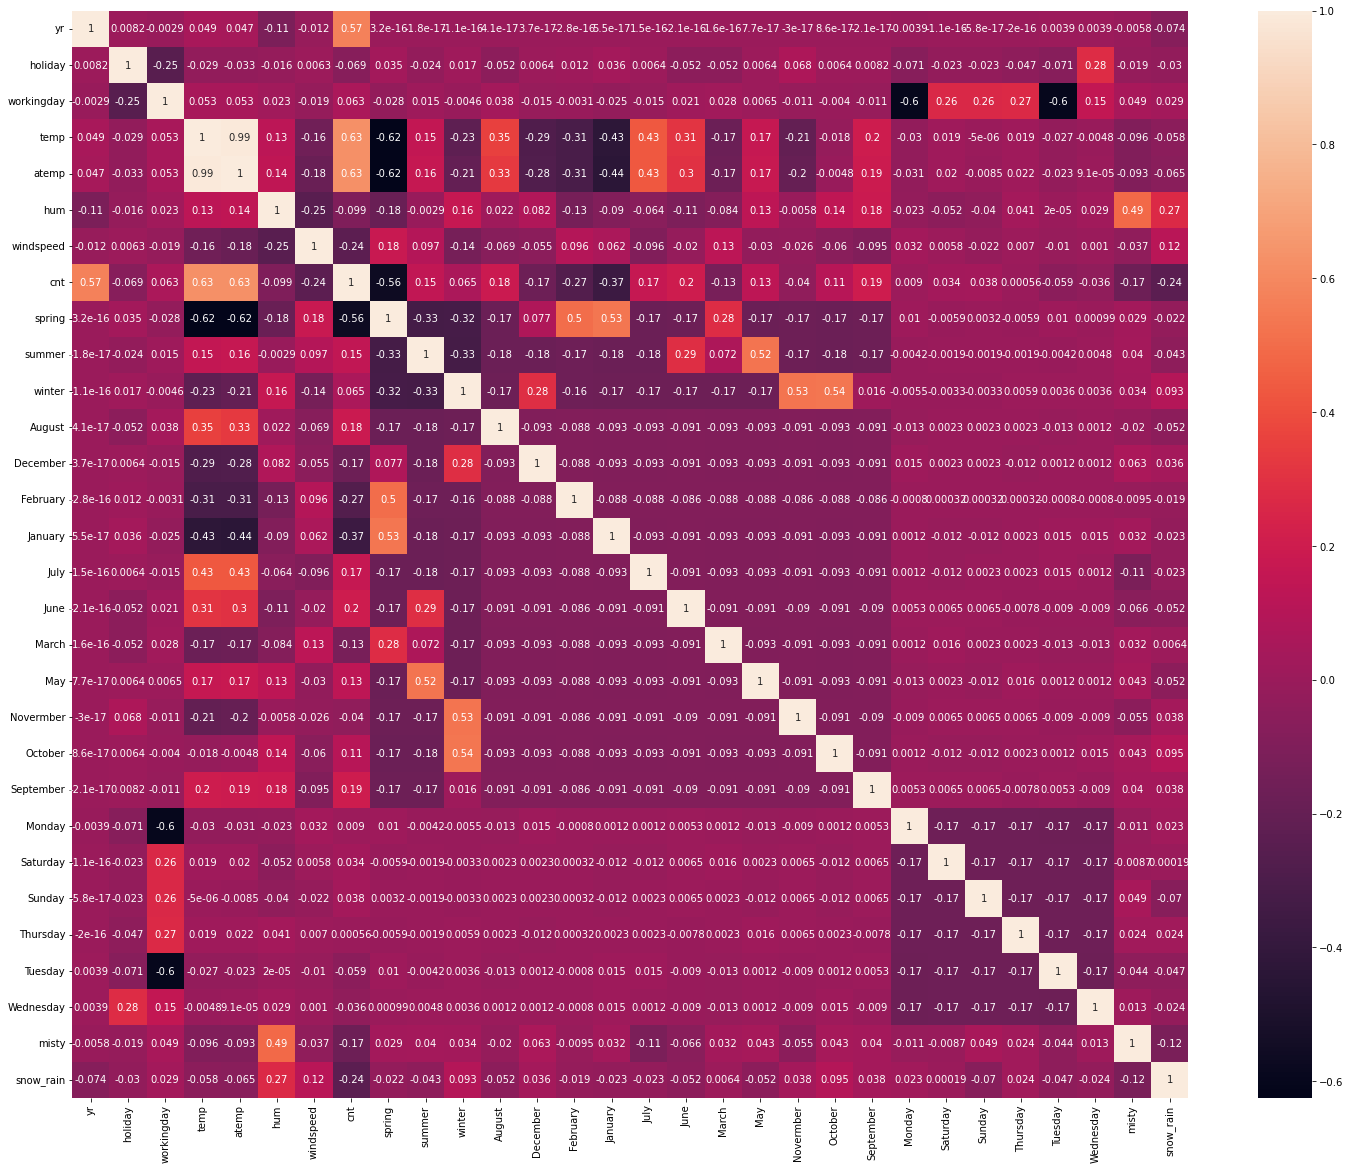

In [59]:
plt.figure(figsize = (25,20))

sns.heatmap(data_dup.corr(), annot=True)

In [60]:
##Observation:- Temp and atemp are correlated to each other.

In [61]:
#Let's split the data into two train and test
train_df, test_df = train_test_split(data_dup, train_size = 0.7, test_size=0.3, random_state=100)

In [62]:
scaler = MinMaxScaler() # We will use Normalization to scale the features

In [63]:
numerical_vars = ["temp", "hum", "windspeed", "cnt"]

train_df[numerical_vars] = scaler.fit_transform(train_df[numerical_vars])

In [64]:
train_df[numerical_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620
std,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.540519,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


## Modeling the Data

In [65]:
y_train = train_df.pop("cnt")
X_train = train_df

In [66]:
# Use the functions to call them later

def Score_of_VIF(X):
    vif = pd.DataFrame()
    vif["features"] = X.columns
    vif["VIF"] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending=False)
    return vif



def OLS_M(X_train_data, y_train = y_train, return_model = False):
    
    X_train_sm = sm.add_constant(X_train_data)
    ols = OLS(y_train, X_train_sm)
    model = ols.fit()
    
    if return_model:
        return model
    else:
        return model.summary()

In [67]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [68]:
rfe = RFE(regressor, n_features_to_select = 15, step = 0.35)
rfe_model = rfe.fit(X_train, y_train)

In [69]:
rfe_data = pd.DataFrame()
rfe_data["features"] = X_train.columns
rfe_data["Support"] = rfe_model.support_
rfe_data["Rankings"] = rfe_model.ranking_
rfe_data.sort_values(by = "Rankings")

,features,Support,Rankings
0,yr,True,1
21,Monday,True,1
20,September,True,1
18,Novermber,True,1
27,misty,True,1
13,January,True,1
11,December,True,1
9,winter,True,1
14,July,True,1
7,spring,True,1


In [70]:
#Acording to the RFE those with rank 1 are best suited to cross-verify will check the vif scores and p values of it

In [71]:
X_train.columns[rfe_model.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'December', 'January', 'July', 'Novermber', 'September', 'Monday',
       'misty', 'snow_rain'],
      dtype='object')

In [72]:
X_train_columns_rfe = X_train.columns[rfe_model.support_]

In [73]:
X_train_rfe = X_train[X_train_columns_rfe]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,winter,December,January,July,Novermber,September,Monday,misty,snow_rain
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,1,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,1,1,0


In [74]:
OLS_M(X_train_data = X_train_rfe)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.3
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          2.93e-188
Time:                        22:41:40   Log-Likelihood:                 512.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     494   BIC:                            -925.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3623      0.032     11.393      0.000       0.300       0.425
yr             0.2317      0.008     28.561      0.000       0.216       0.248
holiday       -0.0876      0.026     -3.400      0.001      -0.138      -0.037
temp           0.4344      0.033     13.188      0.000       0.370       0.499
hum           -0.1453      0.038     -3.848      0.000      -0.219      -0.071
windspeed     -0.1822      0.026     -7.079      0.000      -0.233      -0.132
spring        -0.1009      0.015     -6.551      0.000      -0.131      -0.071
winter         0.0732      0.014      5.188      0.000       0.046       0.101
December      -0.0466      0.017     -2.697      0.007      -0.080      -0.013
January       -0.0513      0.018     -2.848      0.005      -0.087      -0.016
July          -0.0723      0.017     -4.204      0.000      -0.106      -0.039
Novermber     -0.0491      0.019     -2.649      0.008      -0.085      -0.013
September      0.0565      0.016      3.638      0.000       0.026       0.087
Monday         0.0181      0.011      1.632      0.103      -0.004       0.040
misty         -0.0581      0.011     -5.526      0.000      -0.079      -0.037
snow_rain     -0.2552      0.026     -9.653      0.000      -0.307      -0.203
==============================================================================
Omnibus:                       73.583   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.671
Skew:                          -0.739   Prob(JB):                     2.16e-40
Kurtosis:                       5.532   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
Score_of_VIF(X = X_train_rfe)

,features,VIF
3,hum,24.57
2,temp,16.88
4,windspeed,4.10
6,winter,2.98
5,spring,2.94
13,misty,2.26
0,yr,2.07
10,Novermber,1.82
8,January,1.75
7,December,1.54


In [76]:
#So basically values with high vif are not fit to consider.

## Based on the above values VIF and p values which are high has to be deleted.

In [77]:
# Eliminating holiday due to high p-value

X_train_rfe = X_train_rfe.drop("holiday", axis = 1)
X_train_rfe.head()

,yr,temp,hum,windspeed,spring,winter,December,January,July,Novermber,September,Monday,misty,snow_rain
653,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,1,1,0
728,1,0.245101,0.498067,0.663106,1,0,1,0,0,0,0,0,0,0
482,1,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,1,1,0


In [78]:
# Eliminating humidity due to high VIf value
X_train_rfe = X_train_rfe.drop("hum", axis = 1)
X_train_rfe.head()

,yr,temp,windspeed,spring,winter,December,January,July,Novermber,September,Monday,misty,snow_rain
653,1,0.509887,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0.815169,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0.442393,0.255342,1,0,0,0,0,0,0,1,1,0
728,1,0.245101,0.663106,1,0,1,0,0,0,0,0,0,0
482,1,0.395666,0.188475,0,0,0,0,0,0,0,1,1,0


In [79]:
# Removing workingday due to its high VIF value
X_train_rfe = X_train_rfe.drop("temp", axis = 1)
X_train_rfe.head()

,yr,windspeed,spring,winter,December,January,July,Novermber,September,Monday,misty,snow_rain
653,1,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0.255342,1,0,0,0,0,0,0,1,1,0
728,1,0.663106,1,0,1,0,0,0,0,0,0,0
482,1,0.188475,0,0,0,0,0,0,0,1,1,0


In [80]:
OLS_M(X_train_data = X_train_rfe)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     152.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.23e-157
Time:                        22:42:35   Log-Likelihood:                 431.48
No. Observations:                 510   AIC:                            -837.0
Df Residuals:                     497   BIC:                            -781.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5645      0.014     41.670      0.000       0.538       0.591
yr             0.2470      0.009     26.389      0.000       0.229       0.265
windspeed     -0.2075      0.029     -7.241      0.000      -0.264      -0.151
spring        -0.2192      0.015    -15.050      0.000      -0.248      -0.191
winter         0.0069      0.015      0.448      0.654      -0.023       0.037
December      -0.1095      0.019     -5.642      0.000      -0.148      -0.071
January       -0.1222      0.020     -6.079      0.000      -0.162      -0.083
July           0.0136      0.019      0.732      0.464      -0.023       0.050
Novermber     -0.1037      0.021     -4.928      0.000      -0.145      -0.062
September      0.0747      0.018      4.173      0.000       0.040       0.110
Monday         0.0212      0.013      1.641      0.101      -0.004       0.047
misty         -0.0886      0.010     -8.858      0.000      -0.108      -0.069
snow_rain     -0.3095      0.028    -10.935      0.000      -0.365      -0.254
==============================================================================
Omnibus:                       68.456   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.232
Skew:                          -0.727   Prob(JB):                     8.77e-34
Kurtosis:                       5.247   Cond. No.                         8.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
Score_of_VIF(X = X_train_rfe)

,features,VIF
1,windspeed,2.71
3,winter,2.53
2,spring,2.29
0,yr,1.76
7,Novermber,1.76
5,January,1.64
4,December,1.46
10,misty,1.46
9,Monday,1.18
6,July,1.11


<AxesSubplot:>

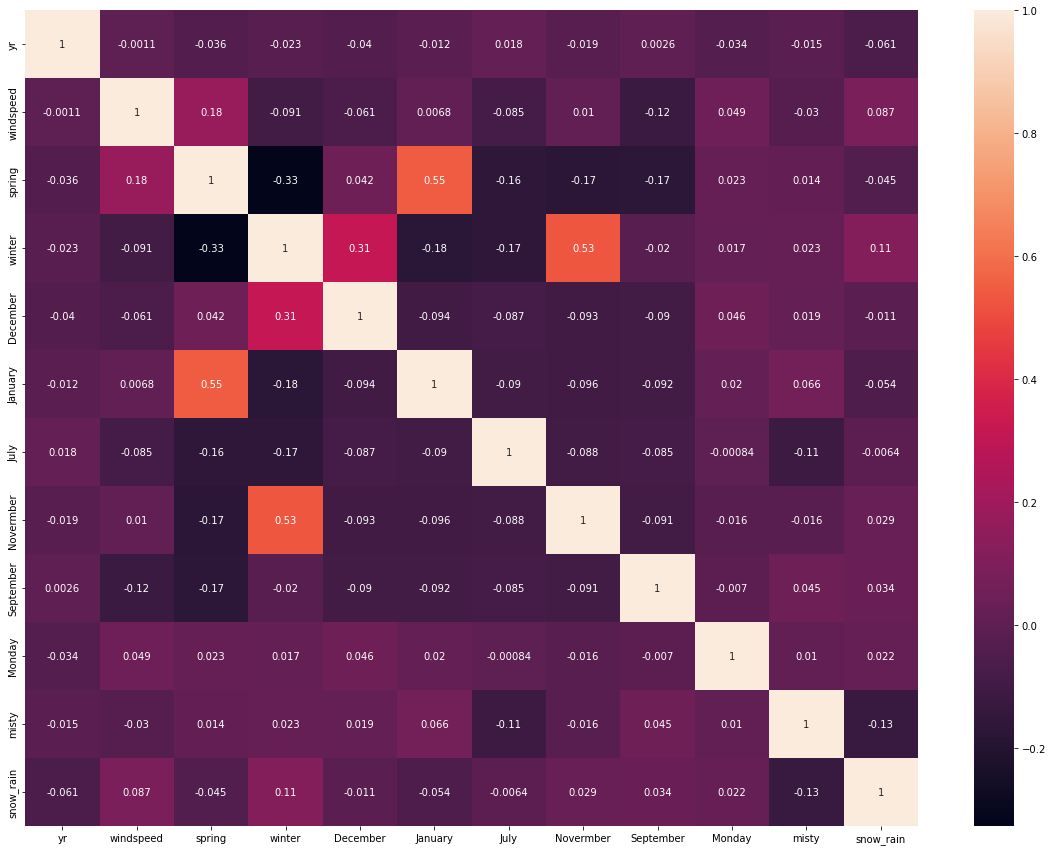

In [82]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train_rfe.corr(), annot=True)

In [84]:
LR_model = OLS_M(X_train_data=X_train_rfe, return_model=True)

In [85]:
LR_model.params

const        0.564456
yr           0.246975
windspeed   -0.207524
spring      -0.219167
winter       0.006899
December    -0.109488
January     -0.122241
July         0.013639
Novermber   -0.103687
September    0.074724
Monday       0.021208
misty       -0.088575
snow_rain   -0.309537
dtype: float64

## Put the above values inside the equation as bias and remaining things with the weight

In [87]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
y_train_pred = LR_model.predict(X_train_rfe_sm)
residuals = y_train - y_train_pred

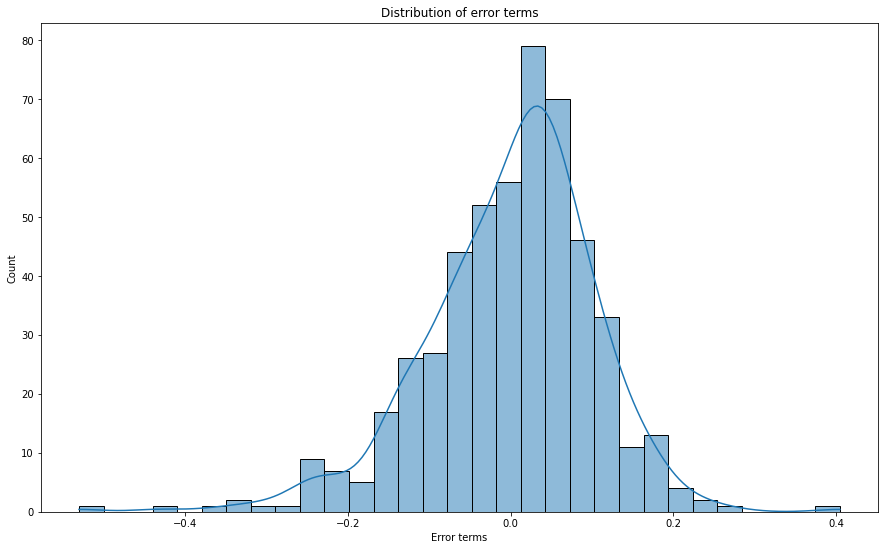

In [88]:
sns.histplot(residuals, kde = True)
plt.title("Distribution of error terms")
plt.xlabel("Error terms")

plt.gcf().set_size_inches(15,9)

In [89]:
np.std(residuals)

0.10383252324936275

In [90]:
np.mean(residuals)

-5.764996323457982e-16

## The error terms must show constant variation (Homoscedasticity)

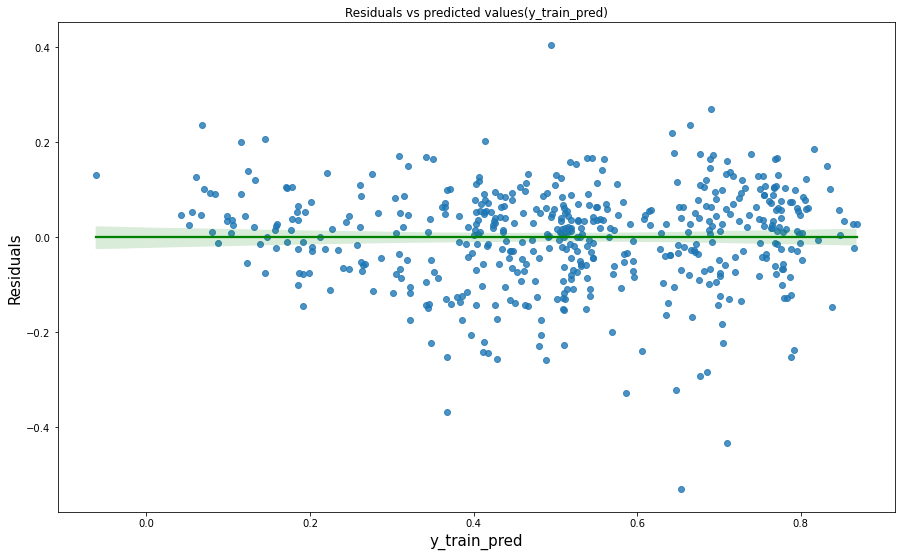

In [92]:
sns.regplot(x = y_train_pred, y = residuals, line_kws = {"color" : "green"})
plt.title("Residuals vs predicted values(y_train_pred)")
plt.xlabel("y_train_pred", fontdict={"fontsize" : 15})
plt.ylabel("Residuals", fontdict={"fontsize" : 15})
plt.gcf().set_size_inches(15,9)

In [93]:
#No pattren can be noticed here 

In [94]:
LR_model.params

const        0.564456
yr           0.246975
windspeed   -0.207524
spring      -0.219167
winter       0.006899
December    -0.109488
January     -0.122241
July         0.013639
Novermber   -0.103687
September    0.074724
Monday       0.021208
misty       -0.088575
snow_rain   -0.309537
dtype: float64

In [95]:
test_df

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,misty,snow_rain
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,10.899153,13.22605,68.7917,11.791732,2947,1,0,...,0,0,0,0,0,0,1,0,1,0
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,...,0,0,0,0,0,1,0,0,0,0
127,0,0,0,21.661653,25.94665,63.1667,5.000712,4333,0,1,...,0,0,0,0,0,0,1,0,0,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,...,1,0,0,0,0,0,0,0,1,0


In [96]:
test_df[numerical_vars] = scaler.transform(test_df[numerical_vars])
test_df

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,misty,snow_rain
184,0,1,0,0.831783,33.27085,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,36.04875,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,22.85230,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,34.24915,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,32.19710,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.257562,13.22605,0.708888,0.287411,0.336516,1,0,...,0,0,0,0,0,0,1,0,1,0
702,1,0,1,0.519232,23.45270,0.756118,0.283397,0.757478,0,0,...,0,0,0,0,0,1,0,0,0,0
127,0,0,0,0.584649,25.94665,0.650923,0.069510,0.495973,0,1,...,0,0,0,0,0,0,1,0,0,0
640,1,0,1,0.745598,29.95665,0.817947,0.052115,0.868615,0,0,...,1,0,0,0,0,0,0,0,1,0


In [101]:
X_test = X_test[X_train_rfe.columns]
X_test

,yr,windspeed,spring,winter,December,January,July,Novermber,September,Monday,misty,snow_rain
184,0,0.084219,0,0,0,0,1,0,0,0,1,0
535,1,0.153728,0,0,0,0,0,0,0,0,0,0
299,0,0.334206,0,1,0,0,0,0,0,0,1,0
221,0,0.339570,0,0,0,0,0,0,0,0,0,0
152,0,0.537414,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0.287411,1,0,0,0,0,0,0,0,1,0
702,1,0.283397,0,1,1,0,0,0,0,0,0,0
127,0,0.069510,0,0,0,0,0,0,0,0,0,0
640,1,0.052115,0,1,0,0,0,0,0,0,1,0


In [103]:
#pre-process
X_test_sm = sm.add_constant(X_test)

In [105]:
y_pred_test = LR_model.predict(X_test_sm)

In [108]:
r2_score(y_true=y_test, y_pred = y_pred_test)

0.7700770986197423

In [109]:
print(f"The accuracy of our model is {round(r2_score(y_true=y_test, y_pred = y_pred_test), 2) * 100}%")

The accuracy of our model is 77.0%


In [110]:
#The accuracy we got is 77%

Text(0, 0.5, 'Predicted values')

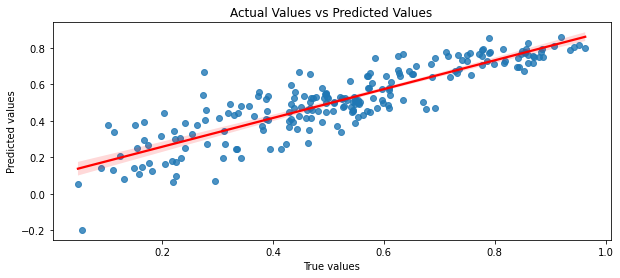

In [111]:
sns.regplot(x = y_test, y = y_pred_test, line_kws = {"color" : "red"})
plt.gcf().set_size_inches(10,4)
plt.title("Actual Values vs Predicted Values")
plt.xlabel("True values")
plt.ylabel('Predicted values')

## Observations:
- Our model was able to predict well, that means the model was able to generalise on the data with 77% accuracy
- Now we can use this model to conclude and achieve our buisness goals

## Conclusion:
- BoomBikes Has a very good market in the society based on the analysis even with the little investement also and apart from the   carbon emission the costumers are having fun with riding the bikes of this company.;

- As the year pass on the growth has been increasing and this company should concentrate on having another branch in the next
  coming years.

- They can take advantage of the weather conditions that in summer more amout of people are intrested int purchasing the bikes compared to the rest of the months.

- Through the EDA analysis it is clear that they can be able to take advantages of the existing features.

- They can increase the investments to even scale Up.